## Prelab
For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

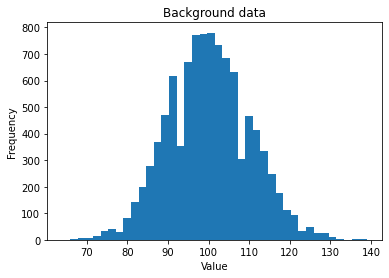

In [1]:
import numpy as np
import matplotlib.pyplot as plt

total_data_points = 10000
rng = np.random.default_rng()
bkgd = rng.poisson(100, total_data_points)

plt.hist(bkgd, bins=40)
plt.title("Background data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Problem 1
#### The first problem is to look at your background distribution and determine where the 5𝜎 sensitivity threshold is.

In [2]:
mean = np.mean(bkgd)
std_dev = np.std(bkgd)

print("5-sigma sensitivity threshold is from " + str(mean-std_dev*5) + " to " + str(mean+std_dev*5))

5-sigma sensitivity threshold is from 49.77562506839917 to 150.37077493160083


## Problem 2
#### Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30𝜎 range. Inject this signal into your background data many times.

In [3]:
data = bkgd + (std_dev * 15)

#### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

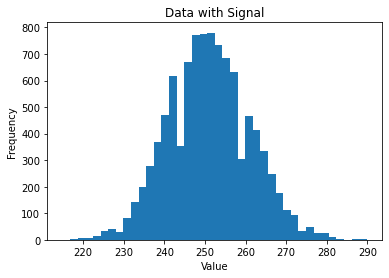

In [4]:
# Plot of all data, with signal injected into it
plt.hist(data, bins=40)
plt.title("Data with Signal")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

The signal is the same shape as the background, just with values 150 higher, meaning the signal is decently consistent across the entire data set and has a strength of around 150.
#### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?
The observed signal appears to be unbiased and symmetric but it is difficult to be completely sure.
## Problem 3
#### Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5𝜎 (30𝜎 or more).

In [5]:
bkgd = rng.poisson(100, total_data_points)
mean = np.mean(bkgd)
std_dev = np.std(bkgd)
signal = rng.uniform(0,30*std_dev,total_data_points)
data = bkgd + signal

#### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data
The background is a poisson distribution with a mean of 100 while the simulated injected signal is a uniform distribution between 0 and the 30-sigma value of the background.

<ipython-input-6-0c934853800a>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


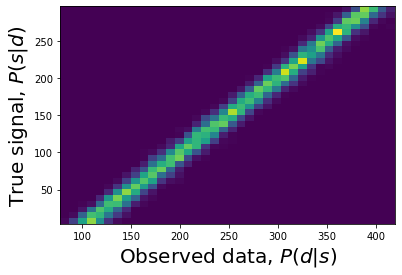

In [6]:
# Code mostly acquired from hw 5, with changes to make it work for the lab
signaledges = np.linspace(0,30*std_dev,40)
dataedges = np.linspace(min(data),max(data),40)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.show()

#### b) For the same injected signal power as in problem 2, show that you get the same answer.

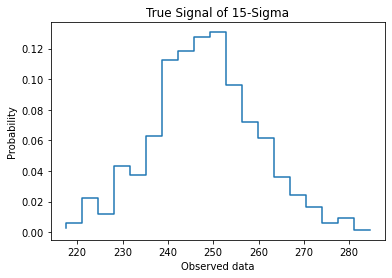

In [7]:
# Finds where signal is within 10 of 15-sigma and then finds the corresponding points in data
his = np.histogram(data[np.where(abs(signal-15*std_dev) < 10)],bins=20)

# weird first part is to convert from histogram format to step format
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))
plt.title("True Signal of 15-Sigma")
plt.xlabel("Observed data")
plt.ylabel("Probability")
plt.show()

The procured histogram is spread approximately from 220-280 centered around 250 and is approximately symmetrical, similarly to the histogram found in Problem 2 where a signal of strength 15-sigma was injected into the data.
#### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5𝜎) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

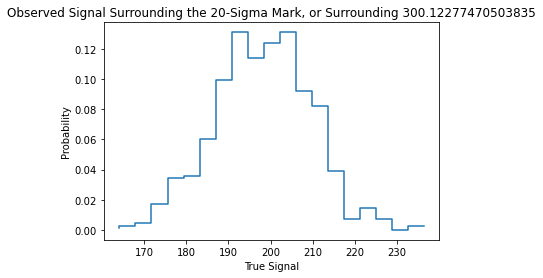

In [8]:
# Finds where data is within 10 of 20-sigma and then finds the corresponding points in signal
his = np.histogram(signal[np.where(abs(data-mean-std_dev*20) < 10)],bins=20)

# weird first part is to convert from histogram format to step format
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))
plt.title("Observed Signal Surrounding the 20-Sigma Mark, or Surrounding " + str(mean+std_dev*20))
plt.xlabel("True Signal")
plt.ylabel("Probability")
plt.show()

The histogram is saying that when looking at all the true signals that resulted in an observed signal of around 300 (aka the 20-sigma mark away from the background mean), the true signals form a mostly-symmetrical distribution with values spanning from around 170 to 235. This offset of around 100 between the observed signal and the true signal is the result of the background being a poisson distribution with a mean of 100, making up the difference between the observed signal and the true signal.

#### d) For your observed signal, what is the 1𝜎 uncertainty on the true signal strength?

In [10]:
print(np.std(signal[np.where(abs(data-mean-std_dev*20) < 10)]))

11.365255338584598


#### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?
Looking back on the graph it seems to be symmetric and unbiased, which makes sense as the values being graphed are the ones where a poisson centered around 100 and a uniformly random number from 0 to 300ish summed to around 300, so it should approximate a poisson distribution with a high mean (as there are enough random numbers for them to be approximated as spread evenly between 0 and 300, leaving only the poisson distribution to determine the spread of the numbers which end up near 300), which is basically symmetrical.